In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 99 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638427 sha256=80f55a213043e82ea5de2b1e5dba9eb964fb0a2eb87947c61ce3dcbef9c3b5ac
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the p

In [2]:
import numpy as np 
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
url = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
df = pd.read_csv(url)
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.resample('D', on='FullDate').sum()
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [7]:
train = df.iloc[:2757]
test = df.iloc[2757:]

In [8]:
train=train.reset_index()
train = train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
train.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [10]:
model = Prophet(daily_seasonality = True)
model.fit(train)

In [11]:
future = model.make_future_dataframe(periods= 100 , freq= 'D' ) 
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,2370.548977,-1363.950566,3433.865717,2370.548977,2370.548977,-1375.780531,-1375.780531,-1375.780531,-1519.596645,...,159.365788,159.365788,159.365788,-15.549674,-15.549674,-15.549674,0.0,0.0,0.0,994.768446
1,2010-09-02,2370.499478,-1451.950161,3407.052798,2370.499478,2370.499478,-1295.479817,-1295.479817,-1295.479817,-1519.596645,...,257.121495,257.121495,257.121495,-33.004667,-33.004667,-33.004667,0.0,0.0,0.0,1075.019661
2,2010-09-03,2370.449980,-1682.382767,3217.294751,2370.449980,2370.449980,-1520.517303,-1520.517303,-1520.517303,-1519.596645,...,50.275881,50.275881,50.275881,-51.196539,-51.196539,-51.196539,0.0,0.0,0.0,849.932677
3,2010-09-04,2370.400482,-1881.591765,2907.617937,2370.400482,2370.400482,-1860.843064,-1860.843064,-1860.843064,-1519.596645,...,-271.456407,-271.456407,-271.456407,-69.790012,-69.790012,-69.790012,0.0,0.0,0.0,509.557419
4,2010-09-05,2370.350984,-2056.517610,2749.749817,2370.350984,2370.350984,-1950.818624,-1950.818624,-1950.818624,-1519.596645,...,-342.743696,-342.743696,-342.743696,-88.478283,-88.478283,-88.478283,0.0,0.0,0.0,419.532360


In [12]:
train2 = train.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", 'SysLoad':'add1', 'Tmax':'add2', 'GasPrice':'add3' })
train2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [14]:
model2 = Prophet(daily_seasonality = True)
model2.fit(train2)

In [15]:
future2 = model2.make_future_dataframe(100, freq='D', )
forecast2 = model2.predict(future2)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,2370.548977,-1292.069434,3506.438844,2370.548977,2370.548977,-1375.780531,-1375.780531,-1375.780531,-1519.596645,...,159.365788,159.365788,159.365788,-15.549674,-15.549674,-15.549674,0.0,0.0,0.0,994.768446
1,2010-09-02,2370.499478,-1360.721068,3374.428435,2370.499478,2370.499478,-1295.479817,-1295.479817,-1295.479817,-1519.596645,...,257.121495,257.121495,257.121495,-33.004667,-33.004667,-33.004667,0.0,0.0,0.0,1075.019661
2,2010-09-03,2370.449980,-1591.878253,3247.639449,2370.449980,2370.449980,-1520.517303,-1520.517303,-1520.517303,-1519.596645,...,50.275881,50.275881,50.275881,-51.196539,-51.196539,-51.196539,0.0,0.0,0.0,849.932677
3,2010-09-04,2370.400482,-1876.355415,2908.360382,2370.400482,2370.400482,-1860.843064,-1860.843064,-1860.843064,-1519.596645,...,-271.456407,-271.456407,-271.456407,-69.790012,-69.790012,-69.790012,0.0,0.0,0.0,509.557419
4,2010-09-05,2370.350984,-1974.395919,2812.073708,2370.350984,2370.350984,-1950.818624,-1950.818624,-1950.818624,-1519.596645,...,-342.743696,-342.743696,-342.743696,-88.478283,-88.478283,-88.478283,0.0,0.0,0.0,419.532360


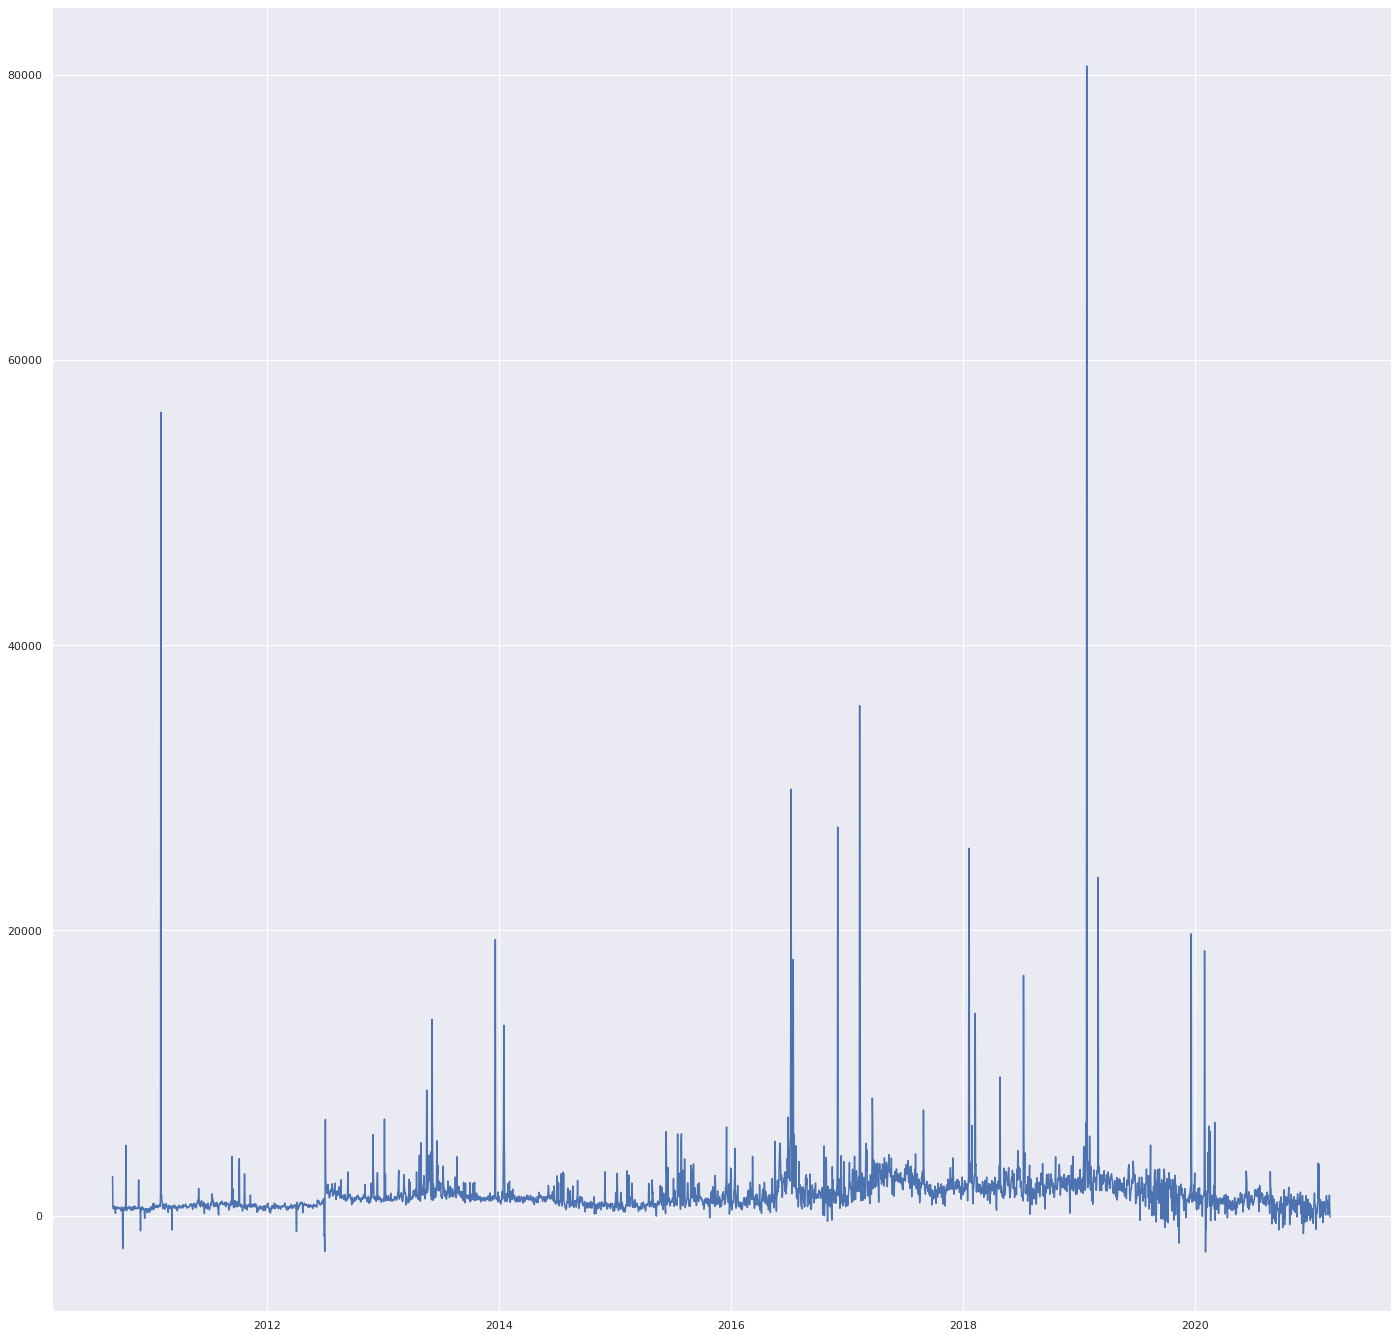

In [21]:

plt.figure(figsize=(24,24))
plt.plot(df.reset_index().FullDate, df.ElecPrice)

In [16]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [22]:
adf_test(df['SysLoad'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.690159
p-value                           0.004254
#Lags Used                       30.000000
Number of Observations Used    3803.000000
Critical Value (1%)              -3.432071
Critical Value (5%)              -2.862300
Critical Value (10%)             -2.567175
dtype: float64


In [23]:
adf_test(df['GasPrice'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.902767
p-value                           0.045027
#Lags Used                       27.000000
Number of Observations Used    3806.000000
Critical Value (1%)              -3.432069
Critical Value (5%)              -2.862300
Critical Value (10%)             -2.567174
dtype: float64


In [24]:


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [26]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,994.768446,-1363.950566,3433.865717,2370.548977,2370.548977,2370.548977
1,2010-09-02,1075.019661,-1451.950161,3407.052798,2370.499478,2370.499478,2370.499478
2,2010-09-03,849.932677,-1682.382767,3217.294751,2370.449980,2370.449980,2370.449980
3,2010-09-04,509.557419,-1881.591765,2907.617937,2370.400482,2370.400482,2370.400482
4,2010-09-05,419.532360,-2056.517610,2749.749817,2370.350984,2370.350984,2370.350984
...,...,...,...,...,...,...,...
2852,2018-06-23,2645.028610,142.956514,4883.457103,4286.550015,4256.826633,4317.867813
2853,2018-06-24,2620.936240,303.644307,4918.554907,4287.359907,4256.712805,4320.660113
2854,2018-06-25,3155.517349,705.949283,5528.326297,4288.169799,4256.974993,4322.892155
2855,2018-06-26,3087.816076,519.449970,5306.984106,4288.979691,4257.314941,4324.717423


In [40]:
actual =train['y']
pred = forecast['yhat'][:2757]

mape(actual, pred)

59.52098494622627

In [42]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = train['y']
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

1862.8254500313108
